In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seastar as ss
from cycler import cycler

In [37]:
azi_step =  5
inci_step = 5

theta =  np.arange(15, 80, inci_step)
azi   =  np.arange(-180, 181, azi_step)

[theta_mat, azi_mat] =  np.meshgrid(theta, azi, indexing='ij')

In [46]:
gmf_name = 'oscar20220522T11-18_v20250318'

wasv = ss.gmfs.doppler.get_second_harmonic_inci_legendre(
    azi_mat,
    theta_mat,
    gmf=gmf_name
)

ds = xr.Dataset(
    data_vars=dict(
        wasv=(['inci','azi'], wasv)
    ),
    coords=dict(
        inci=theta,
        azi=azi,
    ),
    attrs=dict(description=gmf_name)
)
ds['wasv'].attrs['units'] = 'm/s'
ds['azi'].attrs['long_name'] = 'rel. dir. to upwind'
ds['azi'].attrs['units'] = '°'
ds['inci'].attrs['units'] = '°'

Text(0.5, 1.0, 'oscar20220522T11-18_v20250318')

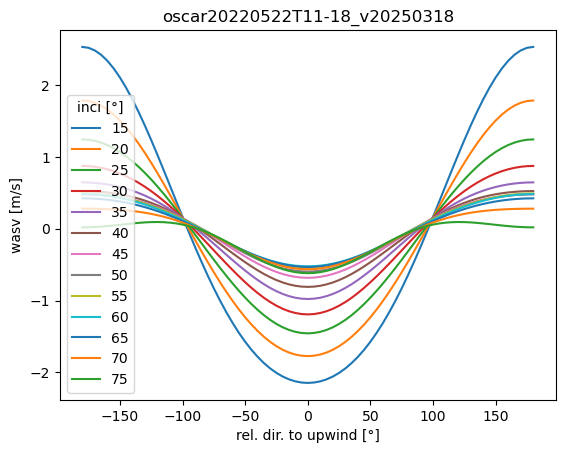

In [47]:
ds.wasv.plot(
    x='azi', hue='inci',
)
plt.title(ds.description)

Text(0.5, 1.0, 'oscar20220522T11-18_v20250318')

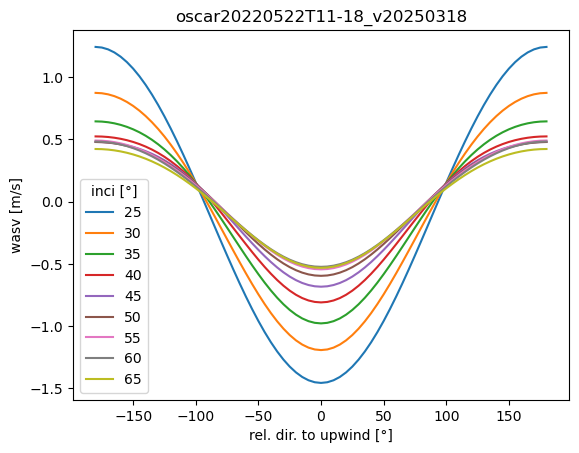

In [48]:
ds.wasv.sel(inci=slice(25,65)).plot(
    x='azi', hue='inci',
)
plt.title(ds.description)

Text(0.5, 1.0, 'oscar20220522T11-18_v20250318')

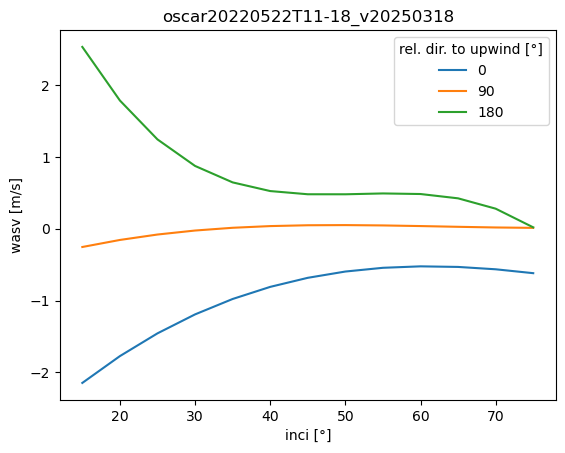

In [50]:
ds.wasv.sel(azi=[0,90,180]).plot(hue='azi')
plt.title(ds.description)